## Part 3: Visualisations

In [1]:
%run "../scripts/outlier.py" "../scripts/paths.json"

/Users/ahirve/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


22/10/07 08:48:51 WARN Utils: Your hostname, Aishwaryas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.16.6.81 instead (on interface en0)
22/10/07 08:48:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/07 08:48:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


22/10/07 08:49:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


22/10/07 08:50:15 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
%run "../scripts/ETL.py" "../scripts/paths.json"

22/10/07 08:50:15 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


- Visualisations to compare number of male vs female consumers DONE
- Visualisations to compare number of male vs female transactions DONE
- Visualisations to compare number of transactions by state DONE
- Visualisations to show number of transactions by month DONE ISH
- Visualisations to show number of transactions by categories (need to preprocess merchants further)

#### Distribution of gender amongst transactions

In [5]:
import matplotlib.pyplot as plt

genders = internal1.select("gender")
genderspd = genders.toPandas()
genderspd.value_counts().plot(kind='bar')

NameError: name 'internal1' is not defined

#### Distribution of genders amongst consumers

In [ ]:
import matplotlib.pyplot as plt

genders = tbl_consumer.select("gender")
genderspd = genders.toPandas()
genderspd.value_counts().plot(kind='bar')

#### Distribution of total revenue for each merchant from online purchases

In [ ]:
total_revenue = aggregated_revenue_pd['sum(dollar_value)']
fig = plt.figure()
plt.boxplot(total_revenue)
plt.show()

In [ ]:
plt.hist(total_revenue)
plt.show()

#### Distributions of transactions by state

In [ ]:
import matplotlib.pyplot as plt

state = internal1.select("state")
statepd = state.toPandas()
statepd.value_counts().plot(kind='bar')

#### Number of transactions made by month

In [ ]:
# date = internal1.select("order_datetime")
# datepd = date.toPandas()
# datepd["counts"] = 1
datepd.groupby(pd.to_datetime(datepd["order_datetime"]).dt.strftime('%b-%Y'), sort=True)["count"].size().plot()
# print(type(datepd["order_datetime"][0]))

In [ ]:
dates = datepd.groupby(pd.to_datetime(datepd["order_datetime"]).dt.strftime('%b-%Y'), sort=True)
dates.head(5)

In [ ]:
datepd["order_datetime"] = pd.to_datetime(datepd["order_datetime"]).dt.to_period('M')

In [ ]:
datepd_groupby = datepd.groupby(["order_datetime"]).count().reset_index()
datepd_groupby

In [ ]:
datepd_groupby.plot(x = "order_datetime")

#### Covid Cases vs Number of Transactions 

In [3]:
#Covid Cases vs Number of Transactions per month 

transactions = spark.read.parquet("../data/tables/full_join.parquet")

In [4]:
transactions.limit(5)

merchant_name,merchant_abn,categories,take_rate,revenue_levels,name,address,state,gender,trans_merchant_abn,dollar_value,order_id,order_datetime,user_id,consumer_id,postcodes,int_sa2,SA2_code,SA2_name,income_2018-2019,total_males,total_females,total_persons,state_code,state_name,population_2020,population_2021,fraud_probability_consumer,fraud_probability_merchant
Dui Nec Corporation,19933438190,tent and awning s...,2.22,c,Brian Wright,761 Bennett Mountain,TAS,Male,19933438190,3.434666831614868,28ccb7e6-ebe7-496...,2021-06-17,2582,743,7016,601021010,601021010,Risdon Vale,58036866,1963,1540,3501,6,Tasmania,3571,3563,0.01,0.01
Vel Est Tempor LLP,62694031334,"computers, comput...",5.76,a,Brian Wright,761 Bennett Mountain,TAS,Male,62694031334,30.583567099986173,d5902566-aa14-4e4...,2021-05-07,2582,743,7016,601021010,601021010,Risdon Vale,58036866,1963,1540,3501,6,Tasmania,3571,3563,0.01,0.01
Aliquam Nisl Corp...,55325186693,"gift, card, novel...",4.44,b,Brian Wright,761 Bennett Mountain,TAS,Male,55325186693,68.91163123686927,234aedaa-1657-466...,2021-07-20,2582,743,7016,601021010,601021010,Risdon Vale,58036866,1963,1540,3501,6,Tasmania,3571,3563,0.01,0.01
Urna Incorporated,78905182348,"watch, clock, and...",4.65,b,Brian Wright,761 Bennett Mountain,TAS,Male,78905182348,15.129648652621713,51d13e41-34a5-496...,2021-06-23,2582,743,7016,601021010,601021010,Risdon Vale,58036866,1963,1540,3501,6,Tasmania,3571,3563,0.01,0.01
Purus Gravida Sag...,21772962346,florists supplies...,6.63,a,Brian Wright,761 Bennett Mountain,TAS,Male,21772962346,0.7692714085929745,af89a162-38c7-48a...,2021-04-21,2582,743,7016,601021010,601021010,Risdon Vale,58036866,1963,1540,3501,6,Tasmania,3571,3563,0.01,0.01


In [31]:
covid_transaction_data = transactions.select("merchant_abn", "order_id", "order_datetime")

covid_transaction_data = covid_transaction_data.select(col("order_datetime"),to_date(col("order_datetime"),"MM-yyyy").alias("temp_date"),col("order_id"))

covid_transaction_data = covid_transaction_data.withColumn("month", month(col("temp_date")))
covid_transaction_data = covid_transaction_data.withColumn("year", year(col("temp_date")))

transactions_2021 = covid_transaction_data.filter(covid_transaction_data.year == 2021)
transactions_2022 = covid_transaction_data.filter(covid_transaction_data.year == 2021)

transactions_month_2021 = transactions_2021.groupBy("month").agg(F.count("order_id").\
alias("num_transactions_month"))

transactions_month_2022 = transactions_2022.groupBy("month").agg(F.count("order_id").\
alias("num_transactions_month"))


In [42]:
transactions_month_2021.limit(5)

month,num_transactions_month
12,711286
6,465771
3,405478
5,472277
9,503820


In [8]:
covid_case_data = pd.read_csv("../data/curated/covid.csv")
covid_case_sdf = spark.createDataFrame(covid_case_data)



Unnamed: 0,date,state_name,covid_cases,yyyy,mm,dd
0,2020-01-25,Australian Capita...,0,2020,1,25
1,2020-01-25,New South Wales,3,2020,1,25
2,2020-01-25,Northern Territory,0,2020,1,25
3,2020-01-25,Queensland,0,2020,1,25
4,2020-01-25,South Australia,0,2020,1,25


In [18]:
#Inner join: 

covid_transaction_data.createOrReplaceTempView("temp")

covid_case_sdf.createOrReplaceTempView("temp2")

covid_plot_data = spark.sql(""" 

SELECT *
FROM temp


INNER JOIN temp2

ON temp.temp_date = temp2.date
""")

In [19]:
covid_plot_data.limit(5)

order_datetime,temp_date,month,year,Unnamed: 0,date,state_name,covid_cases,yyyy,mm,dd
2021-06-22,2021-06-22,6,2021,4119,2021-06-22,Western Australia,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4118,2021-06-22,Victoria,3,2021,6,22
2021-06-22,2021-06-22,6,2021,4117,2021-06-22,Tasmania,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4116,2021-06-22,South Australia,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4115,2021-06-22,Queensland,3,2021,6,22


In [27]:
data_2021 = covid_plot_data.filter(covid_plot_data.year == 2021)
data_2022 = covid_plot_data.filter(covid_plot_data.year == 2022)

data_2021.limit(5)

order_datetime,temp_date,month,year,Unnamed: 0,date,state_name,covid_cases,yyyy,mm,dd
2021-06-22,2021-06-22,6,2021,4119,2021-06-22,Western Australia,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4118,2021-06-22,Victoria,3,2021,6,22
2021-06-22,2021-06-22,6,2021,4117,2021-06-22,Tasmania,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4116,2021-06-22,South Australia,0,2021,6,22
2021-06-22,2021-06-22,6,2021,4115,2021-06-22,Queensland,3,2021,6,22


In [48]:
aggregated_data_2021 = data_2021.groupBy("mm").agg(F.sum("covid_cases").\
alias("total_covid_cases_month"))

aggregated_data_2022 = data_2022.groupBy("mm").agg(F.sum("covid_cases").\
alias("total_covid_cases_month"))


In [49]:
aggregated_data_2021.limit(5)

mm,total_covid_cases_month
7,55835687
6,7898155
9,862862976
5,4626450
10,1145915944


In [46]:
transactions_month_2021.limit(5)

month,num_transactions_month
12,711286
6,465771
3,405478
5,472277
9,503820


In [50]:
aggregated_data_2021.limit(5)

mm,total_covid_cases_month
7,55835687
6,7898155
9,862862976
5,4626450
10,1145915944


In [51]:
#Joins

#2021 

transactions_month_2021.createOrReplaceTempView("temp")

aggregated_data_2021.createOrReplaceTempView("temp2")

covid_plot_data_2021 = spark.sql(""" 

SELECT *
FROM temp


INNER JOIN temp2

ON temp.month = temp2.mm
""")

#2022 

transactions_month_2021.createOrReplaceTempView("temp")

aggregated_data_2022.createOrReplaceTempView("temp2")

covid_plot_data_2022 = spark.sql(""" 

SELECT *
FROM temp


INNER JOIN temp2

ON temp.month = temp2.mm
""")


In [58]:
covid_plot_data_2022.limit(5)

month,num_transactions_month,mm,total_covid_cases_month
7,486528,7,24191004404
6,465771,6,16061016246
9,503820,9,4164816089
5,472277,5,27607963913
3,405478,3,23221105456


In [52]:
covid_plot_data_2021.limit(5)

month,num_transactions_month,mm,total_covid_cases_month
7,486528,7,55835687
6,465771,6,7898155
9,503820,9,862862976
5,472277,5,4626450
10,542524,10,1145915944


In [59]:
covid_plot_data_2021_pdf = covid_plot_data_2021.toPandas()
covid_plot_data_2022_pdf = covid_plot_data_2022.toPandas()


<AxesSubplot:xlabel='total_covid_cases_month'>

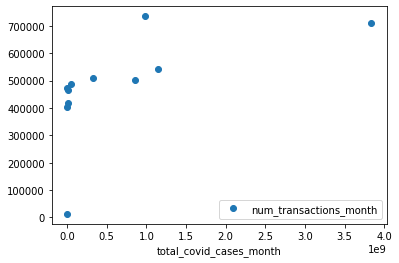

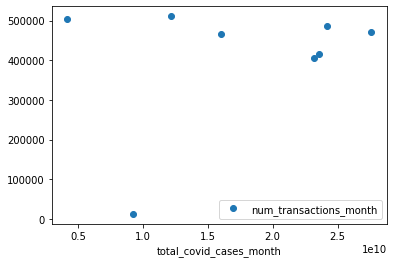

In [61]:
import matplotlib.pyplot as plt
 
# plt.scatter(covid_plot_data_2021["total_covid_cases_month"], covid_plot_data_2021["num_transactions_month"], c ="blue")
 
# plt.show()

covid_plot_data_2021_pdf.plot(x='total_covid_cases_month', y='num_transactions_month', style='o')
covid_plot_data_2022_pdf.plot(x='total_covid_cases_month', y='num_transactions_month', style='o')

No correlation between the number of covid cases and the number of transactions each month for both years 